In [1]:
import cobra
import pandas as pd
import io
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

from cobra.util.solver import linear_reaction_coefficients
from cobra.flux_analysis import flux_variability_analysis
from cobra.flux_analysis import (
    single_gene_deletion, single_reaction_deletion, double_gene_deletion,
    double_reaction_deletion)

import sys
import cobra
import pandas as pd
import re
import json
sys.path.append(r'../script/')
from ECMpy_function import *
from AutoPACMEN_function import *

In [2]:
cobra.Configuration.solver="glpk"
model_iZM516 = cobra.io.read_sbml_model("iZM516.xml")
model_iZM4_478 = cobra.io.read_sbml_model("iZM4_478-pcbi.1008137.s002.xml")
model_ecmodel_iZM547 = get_enzyme_constraint_model("./eciZM547.json")
# model_ecmodel_iZM547 = model_ecmodel_iZM516_median
model_ecmodel_iZM516_median = get_enzyme_constraint_model("./iZM516_20230711_irr_enz_constraint_adj_final_AutoPACMEN_median_brenda.json")
model_ecmodel_DLkcat = get_enzyme_constraint_model("./iZM516_20230711_irr_enz_constraint_adj_final_DLkcat_brenda.json")
model_ecmodel_TurNup = get_enzyme_constraint_model("./iZM516_20230711_irr_enz_constraint_adj_final_TurNup_brenda.json")
model_ecmodel_UniKP = get_enzyme_constraint_model("./iZM516_20230711_irr_enz_constraint_adj_final_UniKP_brenda.json")

print("Summary of model_iZM516:")
print('%d genes' % len(model_iZM516.genes))
print('%d reactions' % len(model_iZM516.reactions))
print('%d metabolites' % len(model_iZM516.metabolites))
print("Summary of model_iZM547:")
print('%d genes' % len(model_ecmodel_iZM547.genes))
print('%d reactions' % len(model_ecmodel_iZM547.reactions))
print('%d metabolites' % len(model_ecmodel_iZM547.metabolites))

ATP_iZMYF = []
biomass_iZMYF = []
sub = []
ATP_478 = []
biomass_478 = []
biomass_ecmodel = []
biomass_ecmodel_median = []
biomass_DLkcat,biomass_TurNup,biomass_UniKP = [],[],[]

model_iZM4_478.reactions.get_by_id("EX_glc_e").bounds = (-1000,1000)
for g in np.arange(0,75,1):
    sub.append(g)
    
    model_iZM4_478.objective = 'BIOMASS_ZM' 
    # model_iZM4_478.reactions.get_by_id("ATPM").bounds = (0,0)
    with model_iZM4_478:
        medium_478 = model_iZM4_478.medium
        medium_478['EX_glc_e'] = g
        medium_478['EX_o2_e'] = 0
        medium_478['EX_nh4_e'] = 1000
        medium_478['EX_n2_e'] = 0
        model_iZM4_478.medium = medium_478
        # pfba_solution = cobra.flux_analysis.pfba(model2)
        fba_solution = model_iZM4_478.optimize()
        try:
            biomass_478.append(fba_solution.fluxes['BIOMASS_ZM'])
        except:
            biomass_478.append(0)
        
    
    
    model_iZM516.objective = 'ZM_BIOMASS'
    with model_iZM516:
        medium_iZMYF = model_iZM516.medium
        medium_iZMYF['EX_glc_D_e'] = g
        medium_iZMYF['EX_o2_e'] = 0
        medium_iZMYF['EX_nh4_e'] = 1000
        medium_iZMYF['EX_n2_e'] = 0
        model_iZM516.medium = medium_iZMYF
        fba_solution = model_iZM516.optimize()
        ATP_iZMYF.append(fba_solution.fluxes['ATPM'])
        try:
            biomass_iZMYF.append(fba_solution.fluxes['ZM_BIOMASS'])
        except:
            biomass_iZMYF.append(0)
        
             
    model_ecmodel_iZM547.objective = 'ZM_BIOMASS'
    # model_ecmodel_iZM547.reactions.get_by_id("ATPM").bounds = (0,0)
    with model_ecmodel_iZM547:
        medium = model_ecmodel_iZM547.medium
        medium['EX_glc_D_e_reverse'] = g
        medium['EX_o2_e'] = 0
        medium['EX_nh4_e_reverse'] = 1000
        medium['EX_n2_e'] = 0
        model_ecmodel_iZM547.medium = medium
        try:
            fba_solution = cobra.flux_analysis.pfba(model_ecmodel_iZM547)
            biomass_ecmodel.append(fba_solution.fluxes['ZM_BIOMASS'])
        except:
            biomass_ecmodel.append(0)
    
    model_ecmodel_iZM516_median.objective = 'ZM_BIOMASS'
    with model_ecmodel_iZM516_median:
        medium = model_ecmodel_iZM516_median.medium
        medium['EX_glc_D_e_reverse'] = g
        medium['EX_o2_e'] = 0
        medium['EX_nh4_e_reverse'] = 1000
        medium['EX_n2_e'] = 0
        model_ecmodel_iZM516_median.medium = medium
        try:
            fba_solution = cobra.flux_analysis.pfba(model_ecmodel_iZM516_median)
            biomass_ecmodel_median.append(fba_solution.fluxes['ZM_BIOMASS'])
        except:
            biomass_ecmodel_median.append(0)
            
    model_ecmodel_DLkcat.objective = 'ZM_BIOMASS'
    with model_ecmodel_DLkcat:
        medium = model_ecmodel_DLkcat.medium
        medium['EX_glc_D_e_reverse'] = g
        medium['EX_o2_e'] = 0
        medium['EX_nh4_e_reverse'] = 1000
        medium['EX_n2_e'] = 0
        model_ecmodel_DLkcat.medium = medium
        try:
            fba_solution = cobra.flux_analysis.pfba(model_ecmodel_DLkcat)
            biomass_DLkcat.append(fba_solution.fluxes['ZM_BIOMASS'])
        except:
            biomass_DLkcat.append(0)
    
    
    model_ecmodel_TurNup.objective = 'ZM_BIOMASS'
    # model_ecmodel_TurNup.reactions.get_by_id("ATPM").bounds = (0,0)
    with model_ecmodel_TurNup:
        medium = model_ecmodel_TurNup.medium
        medium['EX_glc_D_e_reverse'] = g
        medium['EX_o2_e'] = 0
        medium['EX_nh4_e_reverse'] = 1000
        medium['EX_n2_e'] = 0
        model_ecmodel_TurNup.medium = medium
        try:
            fba_solution = cobra.flux_analysis.pfba(model_ecmodel_TurNup)
            biomass_TurNup.append(fba_solution.fluxes['ZM_BIOMASS'])
        except:
            biomass_TurNup.append(0)
    
    
    model_ecmodel_UniKP.objective = 'ZM_BIOMASS'
    with model_ecmodel_UniKP:
        medium = model_ecmodel_UniKP.medium
        medium['EX_glc_D_e_reverse'] = g
        medium['EX_o2_e'] = 0
        medium['EX_nh4_e_reverse'] = 1000
        medium['EX_n2_e'] = 0
        model_ecmodel_UniKP.medium = medium
        try:
            fba_solution = cobra.flux_analysis.pfba(model_ecmodel_UniKP)
            biomass_UniKP.append(fba_solution.fluxes['ZM_BIOMASS'])
        except:
            biomass_UniKP.append(0)

Summary of model_iZM516:
547 genes
1411 reactions
1455 metabolites
Summary of model_iZM547:
547 genes
2501 reactions
1455 metabolites


D:\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
D:\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
D:\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
D:\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
D:\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
D:\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
D:\Python\Python39\lib\site-packages\cob

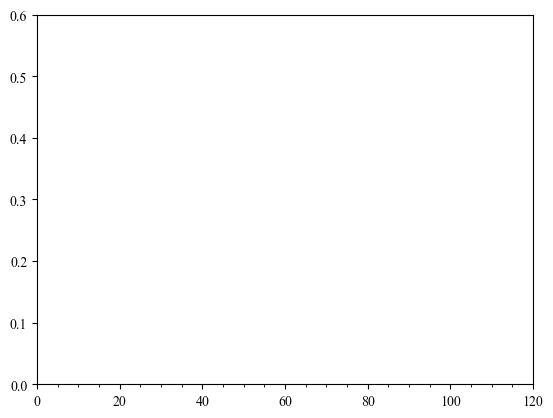

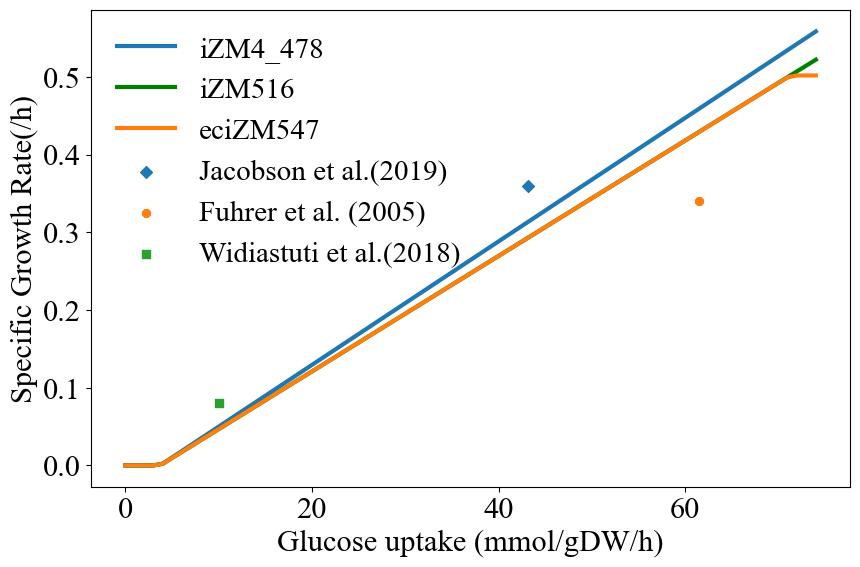

In [3]:
ax = plt.gca() #获得当前的 Axes 对象 [get current axes]
plt.figure(figsize=(9.8, 6.2))
plt.plot(sub,biomass_478, label="iZM4_478", linewidth=3,markersize=12)
plt.plot(sub,biomass_iZMYF, label="iZM516", linewidth=3, color='g',markersize=12)
plt.plot(sub,biomass_ecmodel, label="eciZM547", linewidth=3,markersize=12)
# plt.plot(sub,biomass_ecmodel, label="eciZM547_AutoPACMEN_mean", linewidth=3,color='green',markersize=12)
# plt.plot(sub,biomass_ecmodel_median, label="eciZM547_AutoPACMEN_median", linewidth=3, color='b',markersize=12)
# plt.plot(sub,biomass_DLkcat, label="eciZM547_DLkcat", linewidth=3, color='r',markersize=12)
# plt.plot(sub,biomass_TurNup, label="eciZM547_TurNup", linewidth=3,color='yellow',markersize=12)
# plt.plot(sub,biomass_UniKP, label="eciZM547_UniKP", linewidth=3,markersize=12)


plt.scatter(43.2,0.36,marker = 'D',label="Jacobson et al.(2019)")
plt.scatter(61.5,0.34,marker = '8',label="Fuhrer et al. (2005)")
plt.scatter(10,0.08,marker = 's',label="Widiastuti et al.(2018)")
# plt.scatter(43.2,0.36,marker = 'D')
# plt.scatter(61.5,0.34,marker = '8')
# plt.scatter(10,0.08,marker = 's')



plt.xlabel("Glucose uptake (mmol/gDW/h)",fontsize=22)
plt.ylabel("Specific Growth Rate(/h)",fontsize=22)
plt.legend(loc=0,frameon=False,fontsize=21) 
plt.tick_params(labelsize=22)
plt.rcParams['font.sans-serif'] = "Times New Roman"
ax.set_ylim(0,0.6,0.05)  # biomass 小于 0 的不显示
ax.set_xlim(0,120)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5)) # 设置
af = plt.gcf()
af.savefig('iZM516_iZM4_478_eciZM547_specific_Growth.png')
# af.savefig('eciZM547_version_specific_Growth.png')
plt.show()

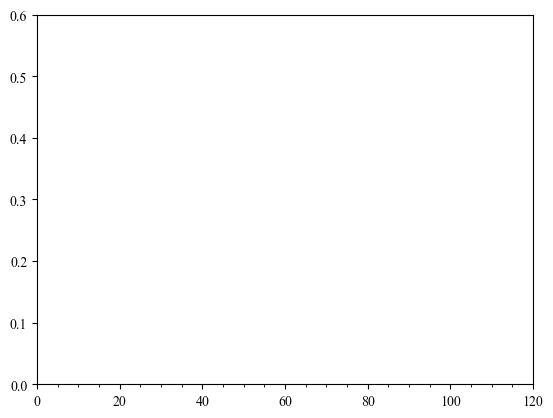

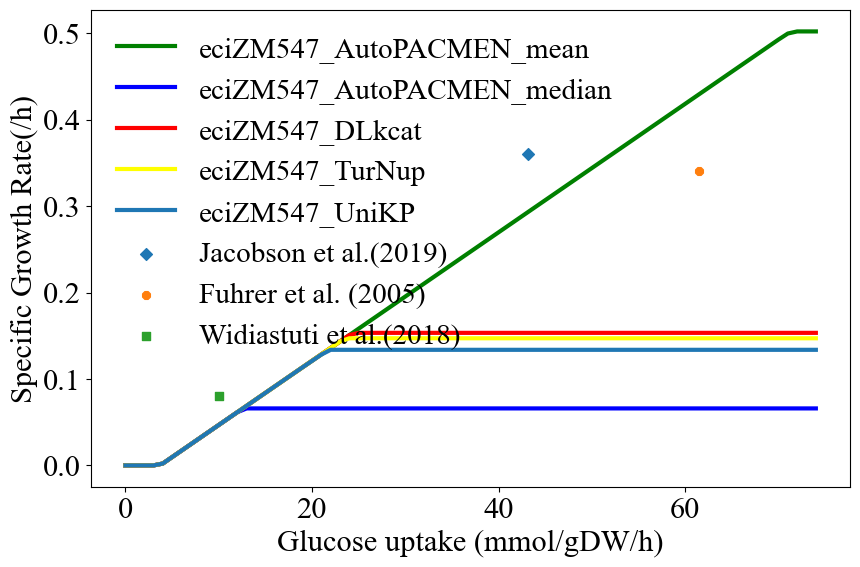

In [4]:
ax = plt.gca() #获得当前的 Axes 对象 [get current axes]
plt.figure(figsize=(9.8, 6.2))
plt.plot(sub,biomass_ecmodel, label="eciZM547_AutoPACMEN_mean", linewidth=3,color='green',markersize=12)
plt.plot(sub,biomass_ecmodel_median, label="eciZM547_AutoPACMEN_median", linewidth=3, color='b',markersize=12)
plt.plot(sub,biomass_DLkcat, label="eciZM547_DLkcat", linewidth=3, color='r',markersize=12)
plt.plot(sub,biomass_TurNup, label="eciZM547_TurNup", linewidth=3,color='yellow',markersize=12)
plt.plot(sub,biomass_UniKP, label="eciZM547_UniKP", linewidth=3,markersize=12)


plt.scatter(43.2,0.36,marker = 'D',label="Jacobson et al.(2019)")
plt.scatter(61.5,0.34,marker = '8',label="Fuhrer et al. (2005)")
plt.scatter(10,0.08,marker = 's',label="Widiastuti et al.(2018)")



plt.xlabel("Glucose uptake (mmol/gDW/h)",fontsize=22)
plt.ylabel("Specific Growth Rate(/h)",fontsize=22)
plt.legend(loc=0,frameon=False,fontsize=21) 
plt.tick_params(labelsize=22)
plt.rcParams['font.sans-serif'] = "Times New Roman"
ax.set_ylim(0,0.6,0.05)  # biomass 小于 0 的不显示
ax.set_xlim(0,120)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5)) # 设置
af = plt.gcf()
# af.savefig('iZM516_iZM4_478_eciZM547_specific_Growth.png')
af.savefig('eciZM547_version_specific_Growth.png')
plt.show()

In [5]:
iZM4_478_sub_biomass_dict = {}
iZMYF_sub_biomass_dict = {}
AutoPACMEN_sub_biomass_dict={}
AutoPACMEN_median_sub_biomass_dict={}
DLkcat_sub_biomass_dict = {}
TurNup_sub_biomass_dict = {}
UniKP_sub_biomass_dict= {}
# print(len(biomass_478),len(sub))
for s in range(len(biomass_478)):
    # print(s,biomass_478[s])
    iZM4_478_sub_biomass_dict[s] = biomass_478[s]
    iZMYF_sub_biomass_dict[s] = biomass_iZMYF[s]
    AutoPACMEN_sub_biomass_dict[s] = biomass_ecmodel[s]
    AutoPACMEN_median_sub_biomass_dict[s] = biomass_ecmodel_median[s]
    DLkcat_sub_biomass_dict[s] = biomass_DLkcat[s]
    TurNup_sub_biomass_dict[s] = biomass_TurNup[s]
    UniKP_sub_biomass_dict[s] = biomass_UniKP[s]


In [6]:
sub = []
# 酒精生成
etoh_478 = []
etoh_iZMYF = []
etoh_ecmodel_median = []
etoh_ecmodel, etoh_DLkcat , etoh_UniKP, etoh_TurNup = [],[],[],[]

model_iZM4_478.reactions.get_by_id("EX_glc_e").bounds = (-1000,1000)

for g in np.arange(0,75,1):
    sub.append(g)
    model_iZM4_478.objective = 'EX_etoh_e'
    # model_iZM4_478.reactions.get_by_id("ATPM").bounds = (0,0)
    with model_iZM4_478:
        # model_iZM4_478.reactions.get_by_id("ATPM").bounds = (0,3.71)
        model_iZM4_478.reactions.get_by_id("BIOMASS_ZM").bounds = (iZM4_478_sub_biomass_dict[g],iZM4_478_sub_biomass_dict[g])
        medium_478 = model_iZM4_478.medium
        medium_478['EX_glc_e'] = g
        medium_478['EX_o2_e'] = 0
        medium_478['EX_nh4_e'] = 1000
        medium_478['EX_n2_e'] = 0
        model_iZM4_478.medium = medium_478
        try:
            fba_solution = model_iZM4_478.optimize()
            etoh_478.append(fba_solution.fluxes['EX_etoh_e'])
        except:
            etoh_478.append(0)
    
    
    model_iZM516.objective = 'EX_etoh_e'
    # model_iZM516.reactions.get_by_id("ATPM").bounds = (0,0)
    with model_iZM516:
        model_iZM516.reactions.get_by_id("ZM_BIOMASS").bounds = (iZMYF_sub_biomass_dict[g],iZMYF_sub_biomass_dict[g])
        medium_iZMYF = model_iZM516.medium
        medium_iZMYF['EX_glc_D_e'] = g
        medium_iZMYF['EX_o2_e'] = 0
        medium_iZMYF['EX_nh4_e'] = 1000
        medium_iZMYF['EX_n2_e'] = 0
        model_iZM516.medium = medium_iZMYF
        # pfba_solution = cobra.flux_analysis.pfba(model2)
        fba_solution = model_iZM516.optimize()
        etoh_iZMYF.append(fba_solution.fluxes['EX_etoh_e'])

    model_ecmodel_iZM547.objective = 'EX_etoh_e'
    model_ecmodel_iZM547.reactions.get_by_id("ATPM").bounds = (0,0)
    with model_ecmodel_iZM547:
        model_ecmodel_iZM547.reactions.get_by_id("ZM_BIOMASS").bounds = (AutoPACMEN_sub_biomass_dict[g],AutoPACMEN_sub_biomass_dict[g])
        medium = model_ecmodel_iZM547.medium
        medium['EX_glc_D_e_reverse'] = g
        medium['EX_o2_e'] = 0
        medium['EX_nh4_e_reverse'] = 1000
        medium['EX_n2_e'] = 0
        model_ecmodel_iZM547.medium = medium
        try:
            fba_solution = cobra.flux_analysis.pfba(model_ecmodel_iZM547)
            etoh_ecmodel.append(fba_solution.fluxes['EX_etoh_e'])
        except:
            etoh_ecmodel.append(0)
            
    model_ecmodel_iZM516_median.objective = 'EX_etoh_e'
    model_ecmodel_iZM516_median.reactions.get_by_id("ATPM").bounds = (0,0)
    with model_ecmodel_iZM516_median:
        model_ecmodel_iZM516_median.reactions.get_by_id("ZM_BIOMASS").bounds = (AutoPACMEN_median_sub_biomass_dict[g],AutoPACMEN_median_sub_biomass_dict[g])
        medium = model_ecmodel_iZM516_median.medium
        medium['EX_glc_D_e_reverse'] = g
        medium['EX_o2_e'] = 0
        medium['EX_nh4_e_reverse'] = 1000
        medium['EX_n2_e'] = 0
        model_ecmodel_iZM516_median.medium = medium
        try:
            fba_solution = cobra.flux_analysis.pfba(model_ecmodel_iZM516_median)
            etoh_ecmodel_median.append(fba_solution.fluxes['EX_etoh_e'])
        except:
            etoh_ecmodel_median.append(0)
    
    
    model_ecmodel_DLkcat.objective = 'EX_etoh_e'
    model_ecmodel_DLkcat.reactions.get_by_id("ATPM").bounds = (0,0)
    with model_ecmodel_DLkcat:
        model_ecmodel_DLkcat.reactions.get_by_id("ZM_BIOMASS").bounds = (DLkcat_sub_biomass_dict[g],DLkcat_sub_biomass_dict[g])
        medium = model_ecmodel_DLkcat.medium
        medium['EX_glc_D_e_reverse'] = g
        medium['EX_o2_e'] = 0
        medium['EX_nh4_e_reverse'] = 1000
        medium['EX_n2_e'] = 0
        model_ecmodel_DLkcat.medium = medium
        try:
            fba_solution = cobra.flux_analysis.pfba(model_ecmodel_DLkcat)
            etoh_DLkcat.append(fba_solution.fluxes['EX_etoh_e'])
        except:
            etoh_DLkcat.append(0)
    
    
    model_ecmodel_TurNup.objective = 'EX_etoh_e'
    model_ecmodel_TurNup.reactions.get_by_id("ATPM").bounds = (0,0)
    with model_ecmodel_TurNup:
        model_ecmodel_TurNup.reactions.get_by_id("ZM_BIOMASS").bounds = (TurNup_sub_biomass_dict[g],TurNup_sub_biomass_dict[g])
        medium = model_ecmodel_TurNup.medium
        medium['EX_glc_D_e_reverse'] = g
        medium['EX_o2_e'] = 0
        medium['EX_nh4_e_reverse'] = 1000
        medium['EX_n2_e'] = 0
        model_ecmodel_TurNup.medium = medium
        try:
            fba_solution = cobra.flux_analysis.pfba(model_ecmodel_TurNup)
            etoh_TurNup.append(fba_solution.fluxes['EX_etoh_e'])
        except:
            etoh_TurNup.append(0)
    
    
    model_ecmodel_UniKP.objective = 'EX_etoh_e'
    model_ecmodel_UniKP.reactions.get_by_id("ATPM").bounds = (0,0)
    with model_ecmodel_UniKP:
        model_ecmodel_UniKP.reactions.get_by_id("ZM_BIOMASS").bounds = (UniKP_sub_biomass_dict[g],UniKP_sub_biomass_dict[g])
        medium = model_ecmodel_UniKP.medium
        medium['EX_glc_D_e_reverse'] = g
        medium['EX_o2_e'] = 0
        medium['EX_nh4_e_reverse'] = 1000
        medium['EX_n2_e'] = 0
        model_ecmodel_UniKP.medium = medium
        try:
            fba_solution = cobra.flux_analysis.pfba(model_ecmodel_UniKP)
            etoh_UniKP.append(fba_solution.fluxes['EX_etoh_e'])
        except:
            etoh_UniKP.append(0)

D:\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
D:\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
D:\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
D:\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
D:\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
D:\Python\Python39\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
D:\Python\Python39\lib\site-packages\cob

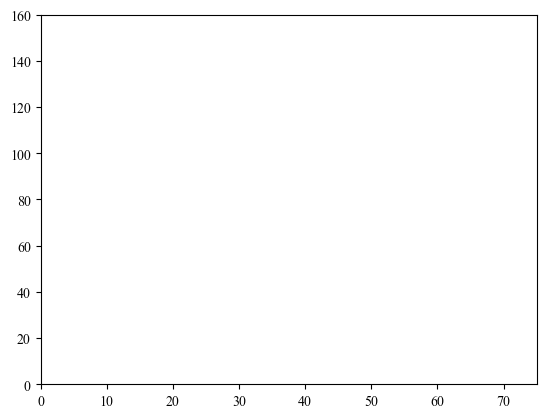

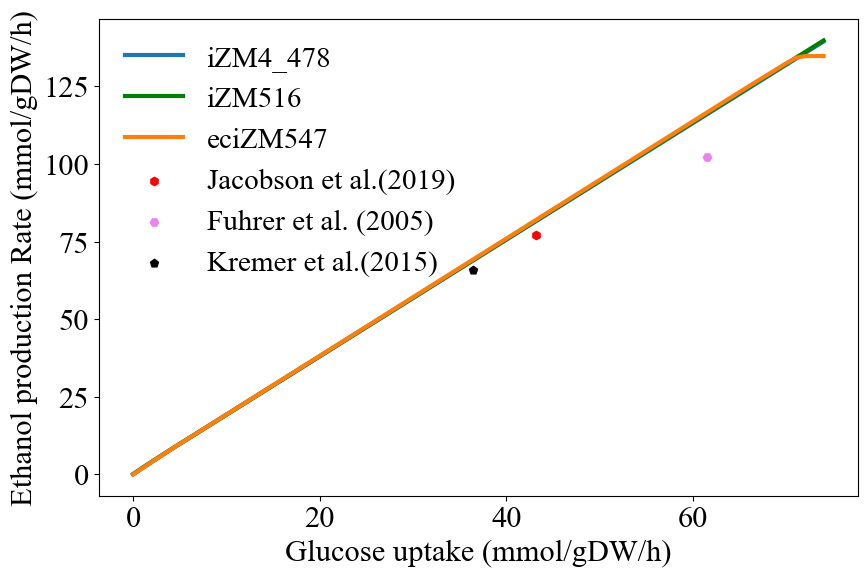

In [7]:
ax = plt.gca() #获得当前的 Axes 对象 [get current axes]
plt.figure(figsize=(9.8, 6.2))

plt.plot(sub,etoh_478, label="iZM4_478", linewidth=3,markersize=20)
plt.plot(sub,etoh_iZMYF, label="iZM516", linewidth=3, color='g',markersize=20)
plt.plot(sub,etoh_ecmodel, label="eciZM547", linewidth=3,markersize=20)
# plt.plot(sub,etoh_ecmodel, label="eciZM547_AutoPACMEN_mean", color="green",linewidth=3,markersize=12)
# plt.plot(sub,etoh_ecmodel_median, label="eciZM547_AutoPACMEN_median", linewidth=3, color='b',markersize=12)
# plt.plot(sub,etoh_DLkcat, label="eciZM547_DLkcat", linewidth=3,color='r',markersize=12)
# plt.plot(sub,etoh_TurNup, label="eciZM547_TurNup", color='yellow', linewidth=3,markersize=12)
# plt.plot(sub,etoh_UniKP, label="eciZM547_UniKP", linewidth=3,markersize=12)


plt.scatter(43.2,77.2,marker = 'h',color='red',label="Jacobson et al.(2019)")
plt.scatter(61.5,102.1,marker = 'H',color='violet',label="Fuhrer et al. (2005)")
plt.scatter(36.4,65.8,marker = 'p',color='black',label="Kremer et al.(2015)")


# plt.scatter(43.2,77.2,marker = 'D')
# plt.scatter(61.5,102.1,marker = '8')
# plt.scatter(36.4,65.8,color = "black",marker = 's')



#酒精生成，固氮时
# plt.scatter(51.0,97.2,marker = 'p',label="Kremer et al.(2015)")

plt.rcParams['font.sans-serif'] = "Times New Roman"
plt.xlabel("Glucose uptake (mmol/gDW/h)",fontsize=22)
plt.ylabel("Ethanol production Rate (mmol/gDW/h)",fontsize=22)
plt.legend(loc=0,frameon=False,fontsize=21) 
plt.tick_params(labelsize=22)
ax.set_ylim(0,160)  # biomass 小于 0 的不显示
ax.set_xlim(0,75)
# plt.savefig('iZM516_iZM4_478_eciZM547_Ethanol_production.png')
plt.savefig('eciZM547_version_Ethanol_production')
plt.show()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [8]:
# 酒精生成

etoh_ecmodel = []

for g in np.arange(0,75,1):
    model_ecmodel_iZM516.objective = 'EX_etoh_e'
    model_ecmodel_iZM516.reactions.get_by_id("ATPM").bounds = (0,0)
    with model_ecmodel_iZM516:
        model_ecmodel_iZM516.reactions.get_by_id("ZM_BIOMASS").bounds = (AutoPACMEN_sub_biomass_dict[g],AutoPACMEN_sub_biomass_dict[g])
        medium = model_ecmodel_iZM516.medium
        medium['EX_glc_D_e_reverse'] = g
        medium['EX_o2_e'] = 0
        medium['EX_nh4_e_reverse'] = 1000
        medium['EX_n2_e'] = 0
        model_ecmodel_iZM516.medium = medium
        try:
            fba_solution = cobra.flux_analysis.pfba(model_ecmodel_iZM516)
            etoh_ecmodel.append(fba_solution.fluxes['EX_etoh_e'])
        except:
            etoh_ecmodel.append(0)

NameError: name 'model_ecmodel_iZM516' is not defined

In [ ]:
ax = plt.gca() #获得当前的 Axes 对象 [get current axes]
plt.figure(figsize=(9.8, 6.2))

plt.plot(sub,etoh_478, label="iZM4_478", linewidth=3,markersize=12)
plt.plot(sub,etoh_iZMYF, label="iZM516", linewidth=3, color='g',markersize=12)
plt.plot(sub,etoh_ecmodel, label="eciZM516", linewidth=3,markersize=12)

# plt.scatter(43.2,77.2,marker = 'D',label="Jacobson et al.(2019)")
# plt.scatter(36.4,65.8,marker = 's',label="Kremer et al.(2015)")
# plt.scatter(61.5,102.1,marker = '8',label="Fuhrer et al. (2005)")

#酒精生成，固氮时
# plt.scatter(51.0,97.2,marker = 'p',label="Kremer et al.(2015)")
plt.xlabel("Glucose uptake (mmol/gDW/h)")
plt.ylabel("Ethanol production Rate (mmol/gDW/h)")
plt.legend(loc=0) 
ax.set_ylim(0,160)  # biomass 小于 0 的不显示
ax.set_xlim(0,75)
plt.savefig('iZM516_iZM4_478_Ethanol_production.png')
plt.show()           